In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

## __1 - Business Problem__  
___Salary_hike -> Build a prediction model for Salary_hike___

## __2 - Data collection and description__ 

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Salary_Data.csv")
df.head()

Saving Salary_Data.csv to Salary_Data (1).csv


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### __Scatter Plot__

In [5]:
x = df['YearsExperience']
y = df['Salary']

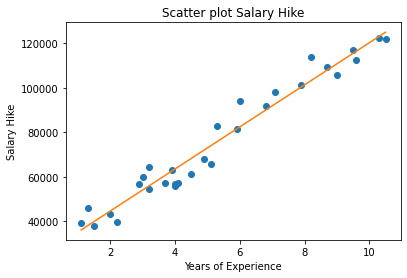

In [6]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

As displayed in the scatter plot,but there is positive correlation between Salary Hike and Years of experience

### __Correlation Analysis__

In [7]:
corr = np.corrcoef(x, y)

Corr  
array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])
         
The correlation between Salary Hike and Years of experience is high (98%)

## __3 - Regression Model__ 

### __1 - No transformation__ 

In [8]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    2.56e-24
Time:                        11:13:44   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __2 - Log Transformation of X__ 

In [10]:
x_log = np.log(df['YearsExperience'])

In [11]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    8.06e-26
Time:                        11:13:44   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __3 - Log Transformation of Y__ 

In [13]:
y_log = np.log(df['Salary'])

In [14]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    6.09e-12
Time:                        11:13:44   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __4 - Log Transformation of X & Y__ 

In [16]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    8.60e-15
Time:                        11:13:44   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __5 - Sq Root Transformation of X__ 

In [18]:
x_sqrt = np.sqrt(df['YearsExperience'])

In [19]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    3.62e-30
Time:                        11:13:44   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __6 - Square Root Transformation of Y__ 

In [21]:
y_sqrt = np.sqrt(df['Salary'])

In [22]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    2.12e-16
Time:                        11:13:44   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __7 - Square Root Transformation of X & Y__ 

In [24]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    2.81e-29
Time:                        11:13:44   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## __4 - Output Interpretation__ 

We will use Model 5 as it has the best R square value  

1 - p-value < 0.01  
Thus the model is accepted

2 - coefficient == 3.48e+04	 
Thus if the value of years of experience is increased by 1, the predicted value of Salary hike will increase by 3.48e+04    

3 - Adj. R-sqared == 0.989  
Thus the model explains 98.9% of the variance in dependent variable